*****(HR) Employee Promotion Prediction: Introduction*****

Welcome to the HR Employee Promotion Prediction project! 
This Python script is designed to analyze employee data and predict whether an employee will be promoted within the organization. 
By using machine learning models, we aim to uncover patterns and insights from key features like department, education, age, training scores, and performance ratings.

***What to expect in this code:***
1. **Data Exploration & Preprocessing**: We begin by exploring the dataset, cleaning missing values, handling outliers, and preparing the data for modeling.
2. **Feature Engineering**: New features will be created, and categorical variables will be converted using one-hot encoding to enhance model accuracy.
3. **Model Building**: We’ll train and evaluate three models: Logistic Regression, Random Forest, and Decision Tree, and assess their performance based on accuracy, precision, recall, and F1 score.
4. **Insights**: Along the way, we’ll extract insights that reveal how various factors influence promotion likelihood.

Why this matters:
This project offers valuable insights into the employee promotion process, helping HR departments make more data-driven decisions. It’s an opportunity to not only predict outcomes but also understand the driving factors behind promotions, improving fairness and efficiency in the workplace.

Let's get started and explore the factors influencing employee promotions!


In [175]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import scipy.stats as stat
import pylab
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [247]:
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    recall_score,
    precision_score,
    confusion_matrix,
    f1_score,
    precision_recall_curve,
    roc_curve,
    RocCurveDisplay,
    PrecisionRecallDisplay
)

**Loading the Dataset**

In [78]:
df = pd.read_csv(r'C:\Users\PC\Desktop\Datasets\employee_promotion.csv')

In [80]:
#Viewing the data
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


Observation
- The table shows that we have thirteen columns: twelve independent variables (employee_id, department, region, education, gender, recruitment_channel, no_of_trainings, age, previous_year_rating, length_of_service, awards_won, avg_training_score) and one dependent variable (Is_promoted)


In [5]:
#Displaying the datatype of each column
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won                int64
avg_training_score      float64
is_promoted               int64
dtype: object

In [6]:
#Checking the shape of the data
df.shape

(54808, 13)

Observation
- The data contains 54808 rows, and 13 columns.

In [8]:
#Checking for missing Values
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

Observation
- Education contains 2409 missing values
- Previous year rating contains 4124 missing values
- average training score contains 2560 missing values

**Handling the missing values**

In [11]:
# Calculating the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
print(missing_percentage[missing_percentage > 0])

education               4.395344
previous_year_rating    7.524449
avg_training_score      4.670851
dtype: float64


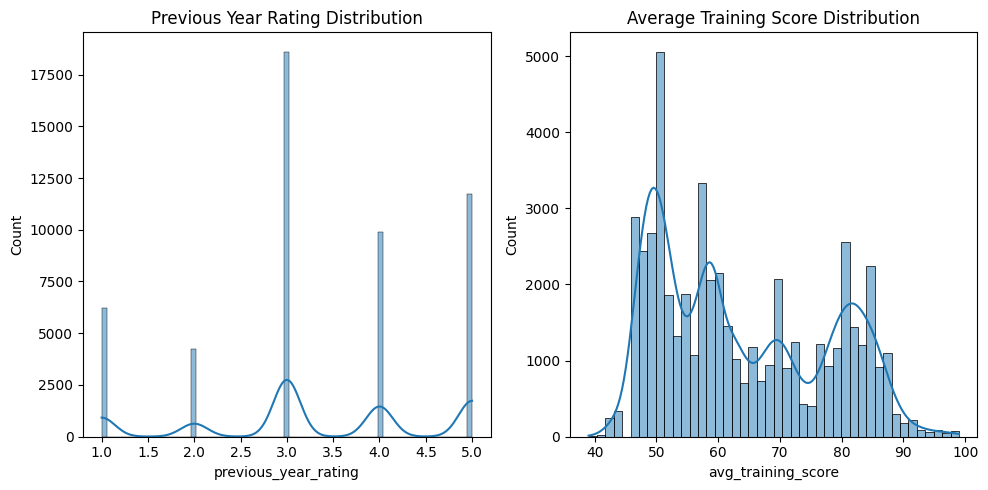

In [27]:
# Create a 1x2 subplot
fig, ax2 = plt.subplots(1, 2, figsize=(10, 5))

# Plotting the distributions
sns.histplot(df['previous_year_rating'], ax=ax2[0], kde=True)
sns.histplot(df['avg_training_score'], ax=ax2[1], kde=True)

# Adding titles for clarity
ax2[0].set_title('Previous Year Rating Distribution')
ax2[1].set_title('Average Training Score Distribution')

# Show the plot
plt.tight_layout()
plt.show()

In [28]:
# Fill missing education with mode
df['education'].fillna(df['education'].mode()[0], inplace=True)

# Fill missing previous_year_rating with the median value
df['previous_year_rating'].fillna(df['previous_year_rating'].median(), inplace=True)

# Fill missing avg_training_score with the mean value
df['avg_training_score'].fillna(df['avg_training_score'].mean(), inplace=True)

Measures for Handling Missing Values:
- Mode: Used for categorical variables to find the most common category, which can replace missing values.
- Median: Used for numerical data that is skewed or has outliers, as it gives a better central value without being affected by extreme numbers.
- Mean: Used for normally distributed numerical data, where all values are similar, allowing for a fair average calculation.

In [29]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

Observation
- The missing values have been handled with the mode, median, and mean.

In [31]:
#Generating statistical summary 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,54808.0,3.304481,1.214770,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
awards_won,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.712238,13.202334,39.0,52.00,62.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


Basic Statistical Overview
- The age of employees ranges from 20 to 60 years, with a mean of 34.8 years.
- The length of service varies from 1 to 37 years, with an average of 5.87 years.
- Employees have attended between 1 and 10 trainings, with a median of 1.
- The previous year rating ranges from 1 to 5, with a mean of 3.33.
- Awards won: Only about 2.3% of employees have won awards.
- The average training score varies between 39 and 99, with a mean score of 63.7.
- Promotion rate: Only 8.5% of employees were promoted (skewed towards non-promotion).

**Employee Promotion Distribution**

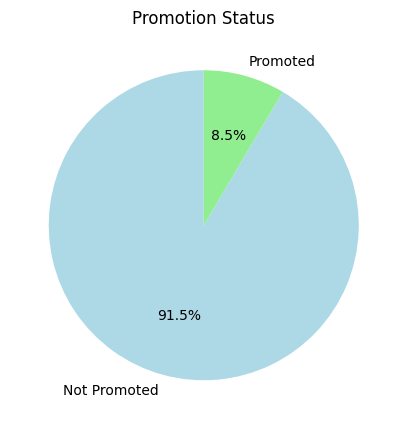

In [117]:
# Pie chart: Distribution of 'is_promoted'
promotion_counts = df['is_promoted'].value_counts()
labels = ['Not Promoted', 'Promoted']

plt.figure(figsize=(5, 6))
plt.pie(promotion_counts, labels=labels, autopct='%2.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Promotion Status')
plt.show()

Observation
- This pie chart shows that 8.5% of employees were promoted, while 91.5% were not promoted, highlighting the disparity in promotion rates.

**Department-wise Promotion Rates**

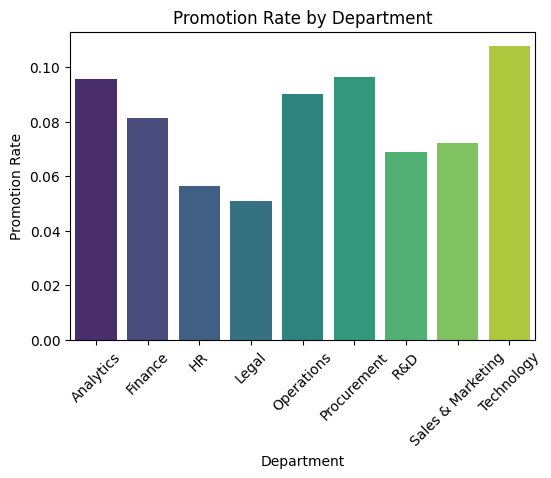

In [98]:
# Bar chart: Promotion rates by department
promotion_by_department = df.groupby('department')['is_promoted'].mean()
plt.figure(figsize=(6,4))
sns.barplot(x=promotion_by_department.index, y=promotion_by_department.values, palette='viridis')
plt.title('Promotion Rate by Department')
plt.xlabel('Department')
plt.ylabel('Promotion Rate')
plt.xticks(rotation=45)
plt.show()

Observation
- This bar chart shows the promotion rates by department, with Technology having the highest promotion rate (~10.5%), followed by Analytics, Procurement, and Operations, while Legal and HR have the lowest rates. This highlights departmental differences in promotion likelihood.

In [37]:
df['department'].value_counts()

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64

Observation
- The distribution of employees by department shows that Sales & Marketing has the highest number at 16,840, while R&D has the fewest with just 999, indicating a strong focus on sales and marketing within the organization.

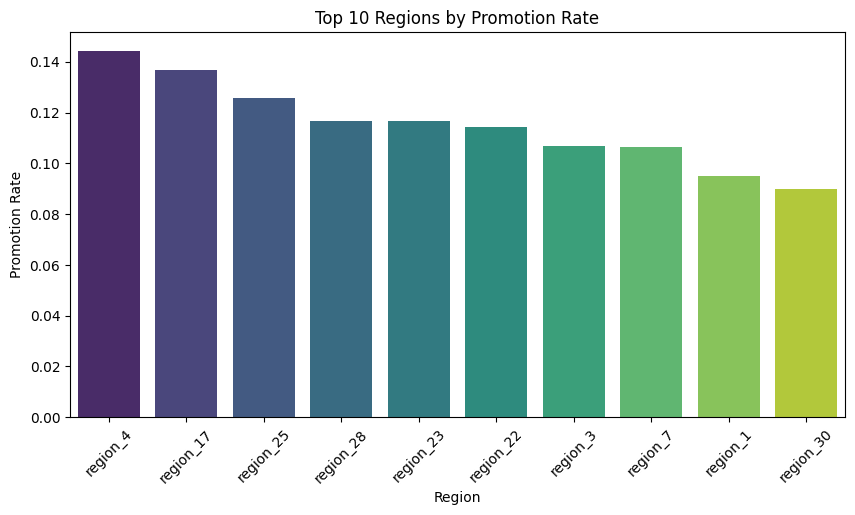

In [114]:
region_promotion = df.groupby('region')['is_promoted'].mean()
top_10_regions = region_promotion.sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_regions.index, y=top_10_regions.values, palette='viridis')
plt.title('Top 10 Regions by Promotion Rate')
plt.xlabel('Region')
plt.ylabel('Promotion Rate')
plt.xticks(rotation=45)
plt.show()

Observation
- This bar chart shows the top 10 regions by promotion rate, with region_4 leading at ~14%, followed by region_17 and region_25. It highlights regional differences in promotion success.

In [40]:
df['education'].value_counts()

education
Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

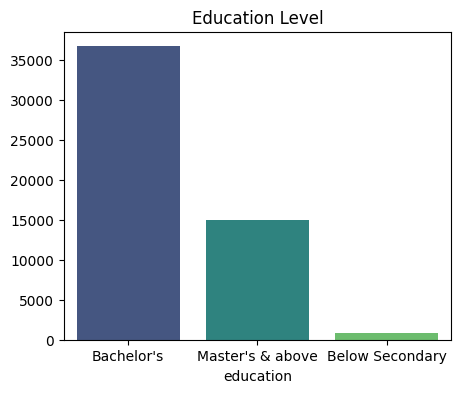

In [102]:
# Pie chart: Distribution of 'is_promoted'
education_counts = df['education'].value_counts()
labels = ['Bachelors', 'Masters & above', 'Below Secondary' ]

plt.figure(figsize=(5, 4))
#plt.pie(education_counts, labels=labels, autopct='%2.1f%%', startangle=90)
sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis')
plt.title('Education Level')
plt.show()

This bar chart shows the education levels of individuals, with "Bachelor's" having the highest count (over 39,078), followed by "Master's & above" (around 14,925), and "Below Secondary education" having the lowest (805).

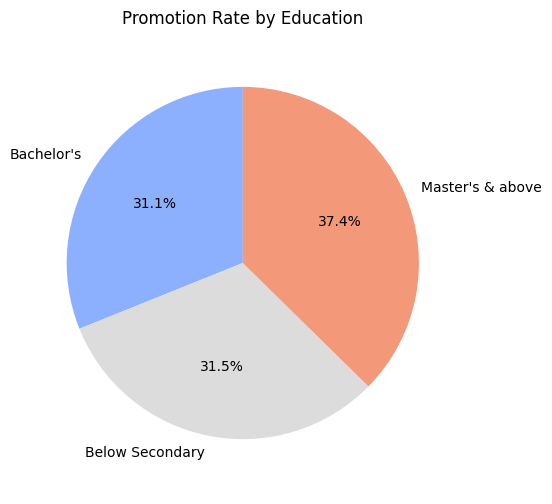

In [112]:
education_promotion = df.groupby('education')['is_promoted'].mean()
plt.figure(figsize=(5,6))
plt.pie(education_promotion.values, labels=education_promotion.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm', len(education_promotion)))

plt.title('Promotion Rate by Education')
plt.axis('equal')
plt.show()

Observation
- This pie chart shows the promotion rate by education level, with "Master's & above" leading at 37.4%, followed by "Below Secondary" at 31.5% despite it having the lowest employee count, and "Bachelor's" at 31.1%.

In [41]:
df['gender'].value_counts()

gender
m    38496
f    16312
Name: count, dtype: int64

Observation
- The gender distribution reveals a significant majority of employees are male (38,496) compared to female employees (16,312).

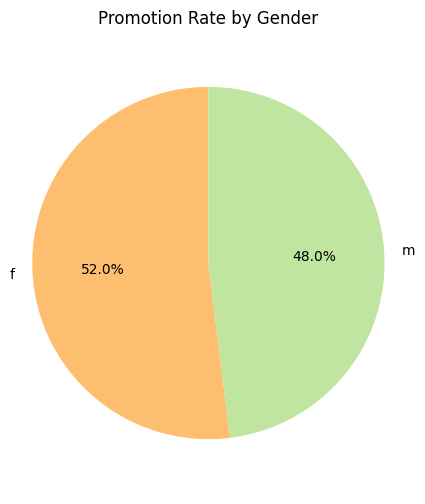

In [119]:
# Pie chart: Distribution of 'is_promoted'
gender_counts = df.groupby('gender')['is_promoted'].mean()
plt.figure(figsize=(5, 6))
#plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ffbb78', 'lightgreen'])
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Spectral', len(gender_counts)))

plt.title('Promotion Rate by Gender')
plt.axis('equal')
plt.show()

Observation
- This pie chart shows the promotion rate by gender, with females leading at 52% and males at 48%. It highlights a slightly higher promotion rate for females compared to males.

In [42]:
df['recruitment_channel'].value_counts()

recruitment_channel
other       30446
sourcing    23220
referred     1142
Name: count, dtype: int64

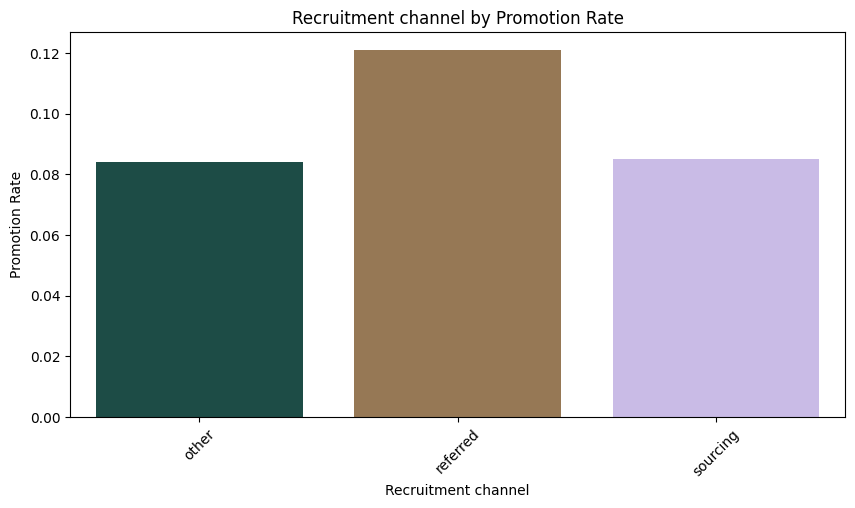

In [118]:
rc_promotion = df.groupby('recruitment_channel')['is_promoted'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=rc_promotion.index, y=rc_promotion.values, palette='cubehelix')
plt.title('Recruitment channel by Promotion Rate')
plt.xlabel('Recruitment channel')
plt.ylabel('Promotion Rate')
plt.xticks(rotation=45)
plt.show()

Observation
- This bar chart shows promotion rates by recruitment channel, with "Referred" having the highest rate 12%, followed by "Sourcing" and "Other."

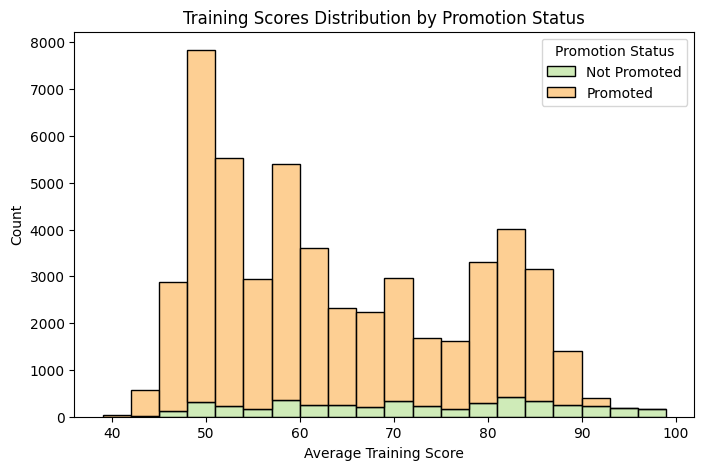

In [132]:
# Histogram for training scores
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='avg_training_score', hue='is_promoted', kde=False, palette='Spectral', bins=20, multiple="stack")
plt.title('Training Scores Distribution by Promotion Status')
plt.xlabel('Average Training Score')
plt.ylabel('Count')
plt.legend(title='Promotion Status', labels=['Not Promoted', 'Promoted'])
plt.show()

Observation
- The histogram shows average training scores, with those promoted (orange) versus not promoted (green). It’s evident that higher scores, especially above 70, correlate with a higher likelihood of promotion, while lower scores are more common among those not promoted.

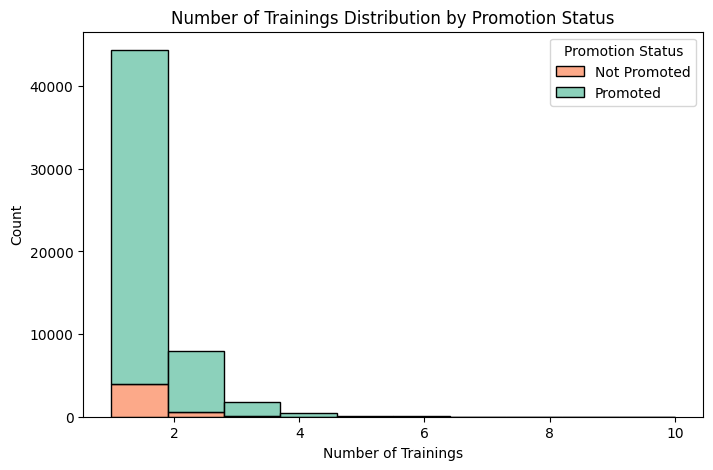

In [134]:
# Histogram for number of trainings attended
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='no_of_trainings', hue='is_promoted', kde=False, palette='Set2', bins=10, multiple="stack")
plt.title('Number of Trainings Distribution by Promotion Status')
plt.xlabel('Number of Trainings')
plt.ylabel('Count')
plt.legend(title='Promotion Status', labels=['Not Promoted', 'Promoted'])
plt.show()

Observation
- This bar chart shows that most promotions occur after 1 or 2 trainings, with fewer promotions as the number of trainings increases. The data suggests that having more trainings doesn't necessarily increase the likelihood of getting promoted.

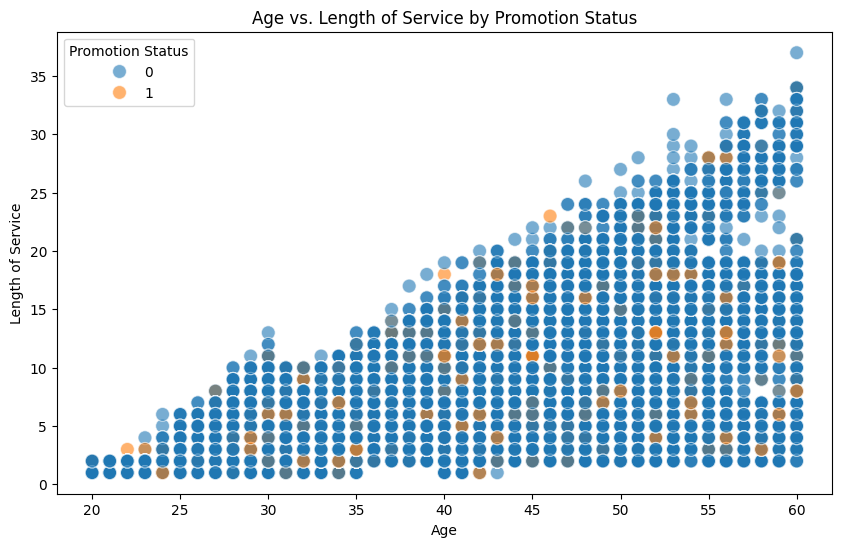

In [143]:
# Scatter plot for Age vs Length of Service
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age', y='length_of_service', hue='is_promoted', s=100, alpha=0.6)
plt.title('Age vs. Length of Service by Promotion Status')
plt.xlabel('Age')
plt.ylabel('Length of Service')
plt.legend(title='Promotion Status')
plt.show()

Observation
- This histogram shows average training scores, with 0 (not promoted) and 1 (promoted). Higher scores, especially above 70, correlate with a higher likelihood of promotion, while lower scores are more common among those not promoted. This suggests that higher training scores are a significant factor in promotions.

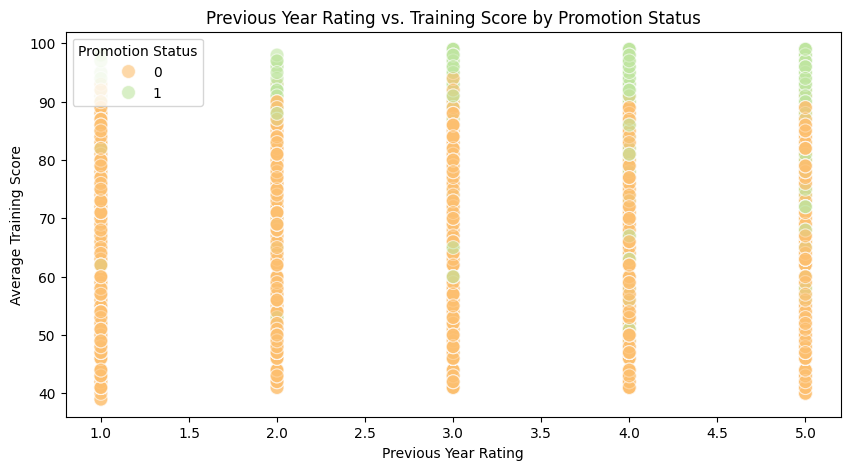

In [144]:
# Scatter plot for Previous Year Rating vs Training Score
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='previous_year_rating', y='avg_training_score', hue='is_promoted', palette='Spectral', s=100, alpha=0.6)
plt.title('Previous Year Rating vs. Training Score by Promotion Status')
plt.xlabel('Previous Year Rating')
plt.ylabel('Average Training Score')
plt.legend(title='Promotion Status')
plt.show()


Observation
- This scatter plot shows the relationship between previous year rating and average training score, by promotion status. Promoted individuals (1) have a higher concentration of training scores above 80 across all rating levels, indicating that higher training scores significantly contribute to promotions. Individuals with higher previous year ratings (4.0 and 5.0) are also more likely to be promoted.

**Distribution Plot (Numerical variables) to view the outliers**

In [57]:
num_features=[i for i in df.columns if df.dtypes[i]!='object']
num_features

['employee_id',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'awards_won',
 'avg_training_score',
 'is_promoted']

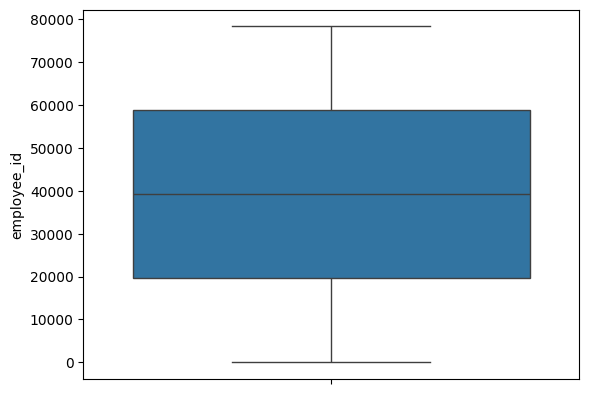

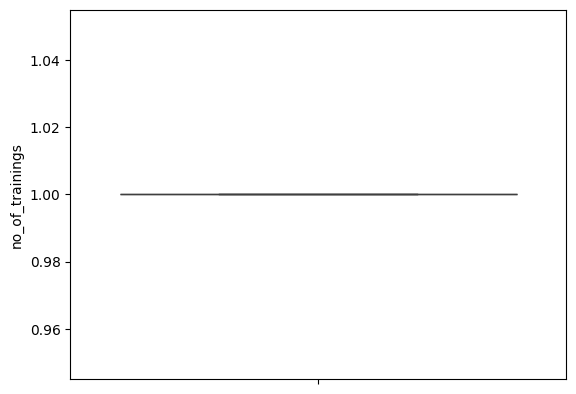

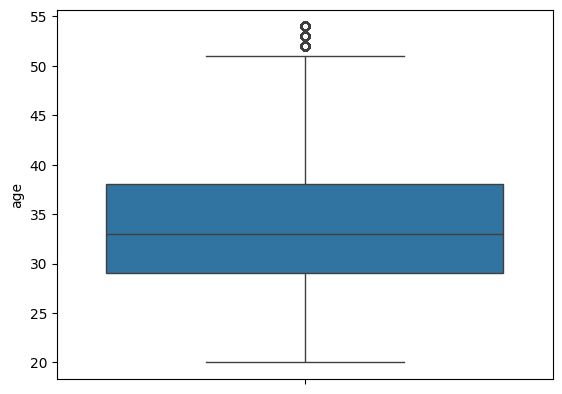

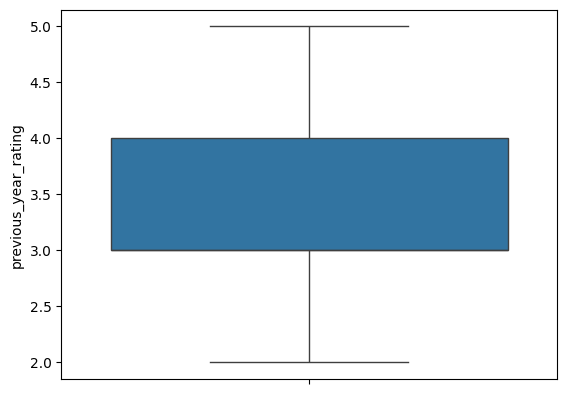

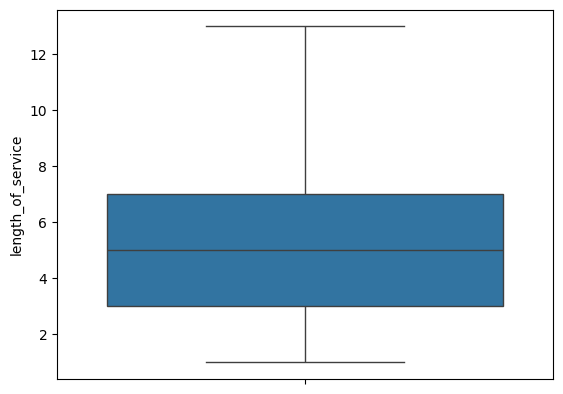

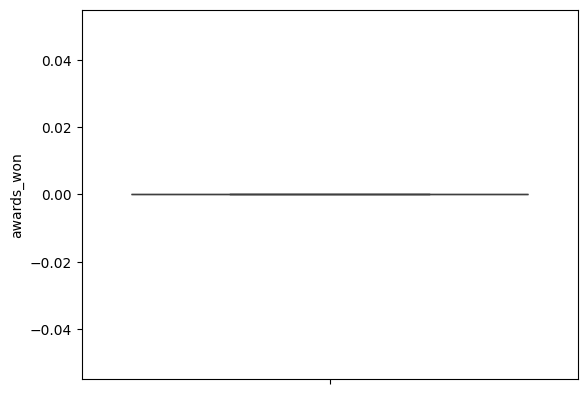

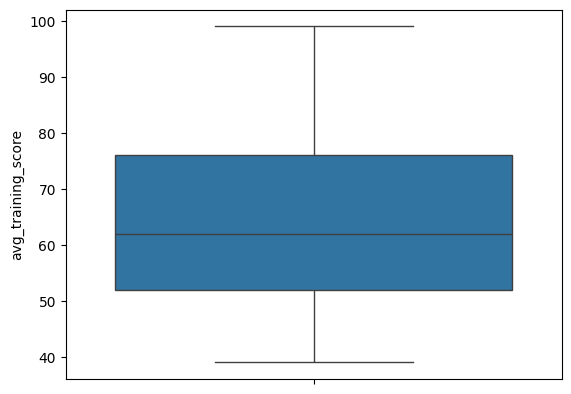

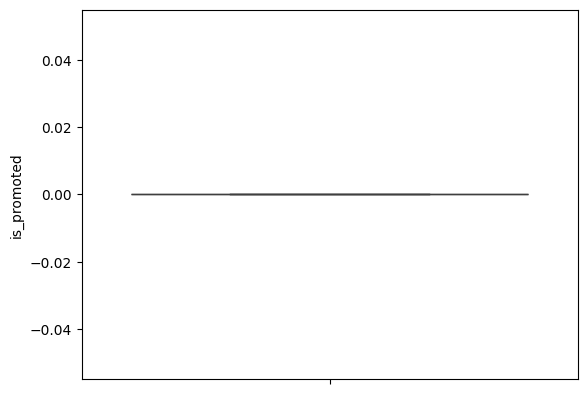

In [71]:
for i in num_features:
    plt.figsize=(5,5)
    sns.boxplot(y=df[i])
    plt.show()

**Replacing the Outliers**

In [62]:
# Iterate only over numerical columns
for cols in df.select_dtypes(include=['int64', 'float64']).columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    
    # Calculate IQR (Interquartile Range)
    iqr = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    low = Q1 - 1.5 * iqr
    high = Q3 + 1.5 * iqr
    
    # Replace outliers with the median of the column
    median_value = df[cols].median()
    df.loc[(df[cols] < low) | (df[cols] > high), cols] = median_value


Iterating through the numerical columns in the DataFrame, calculating the interquartile range (IQR) to identify outliers, and replaces any values outside the bounds (1.5 times the IQR below Q1 or above Q3) with the column's median.

<Axes: >

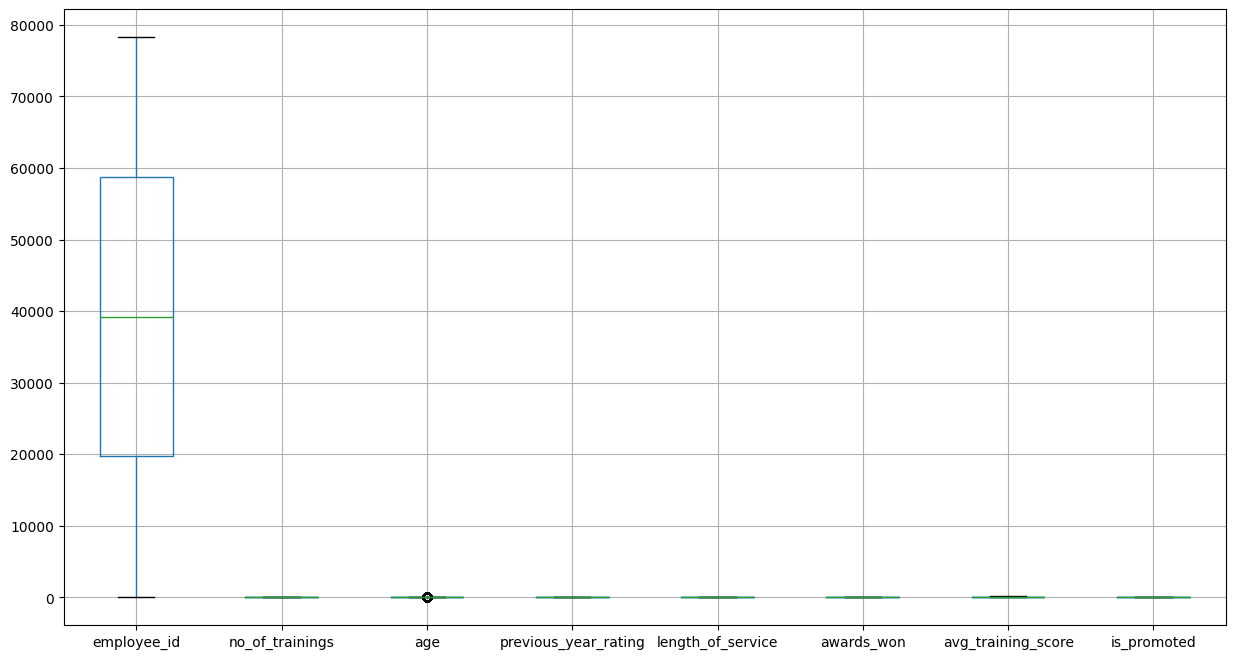

In [66]:
df.boxplot(figsize=(15,8))

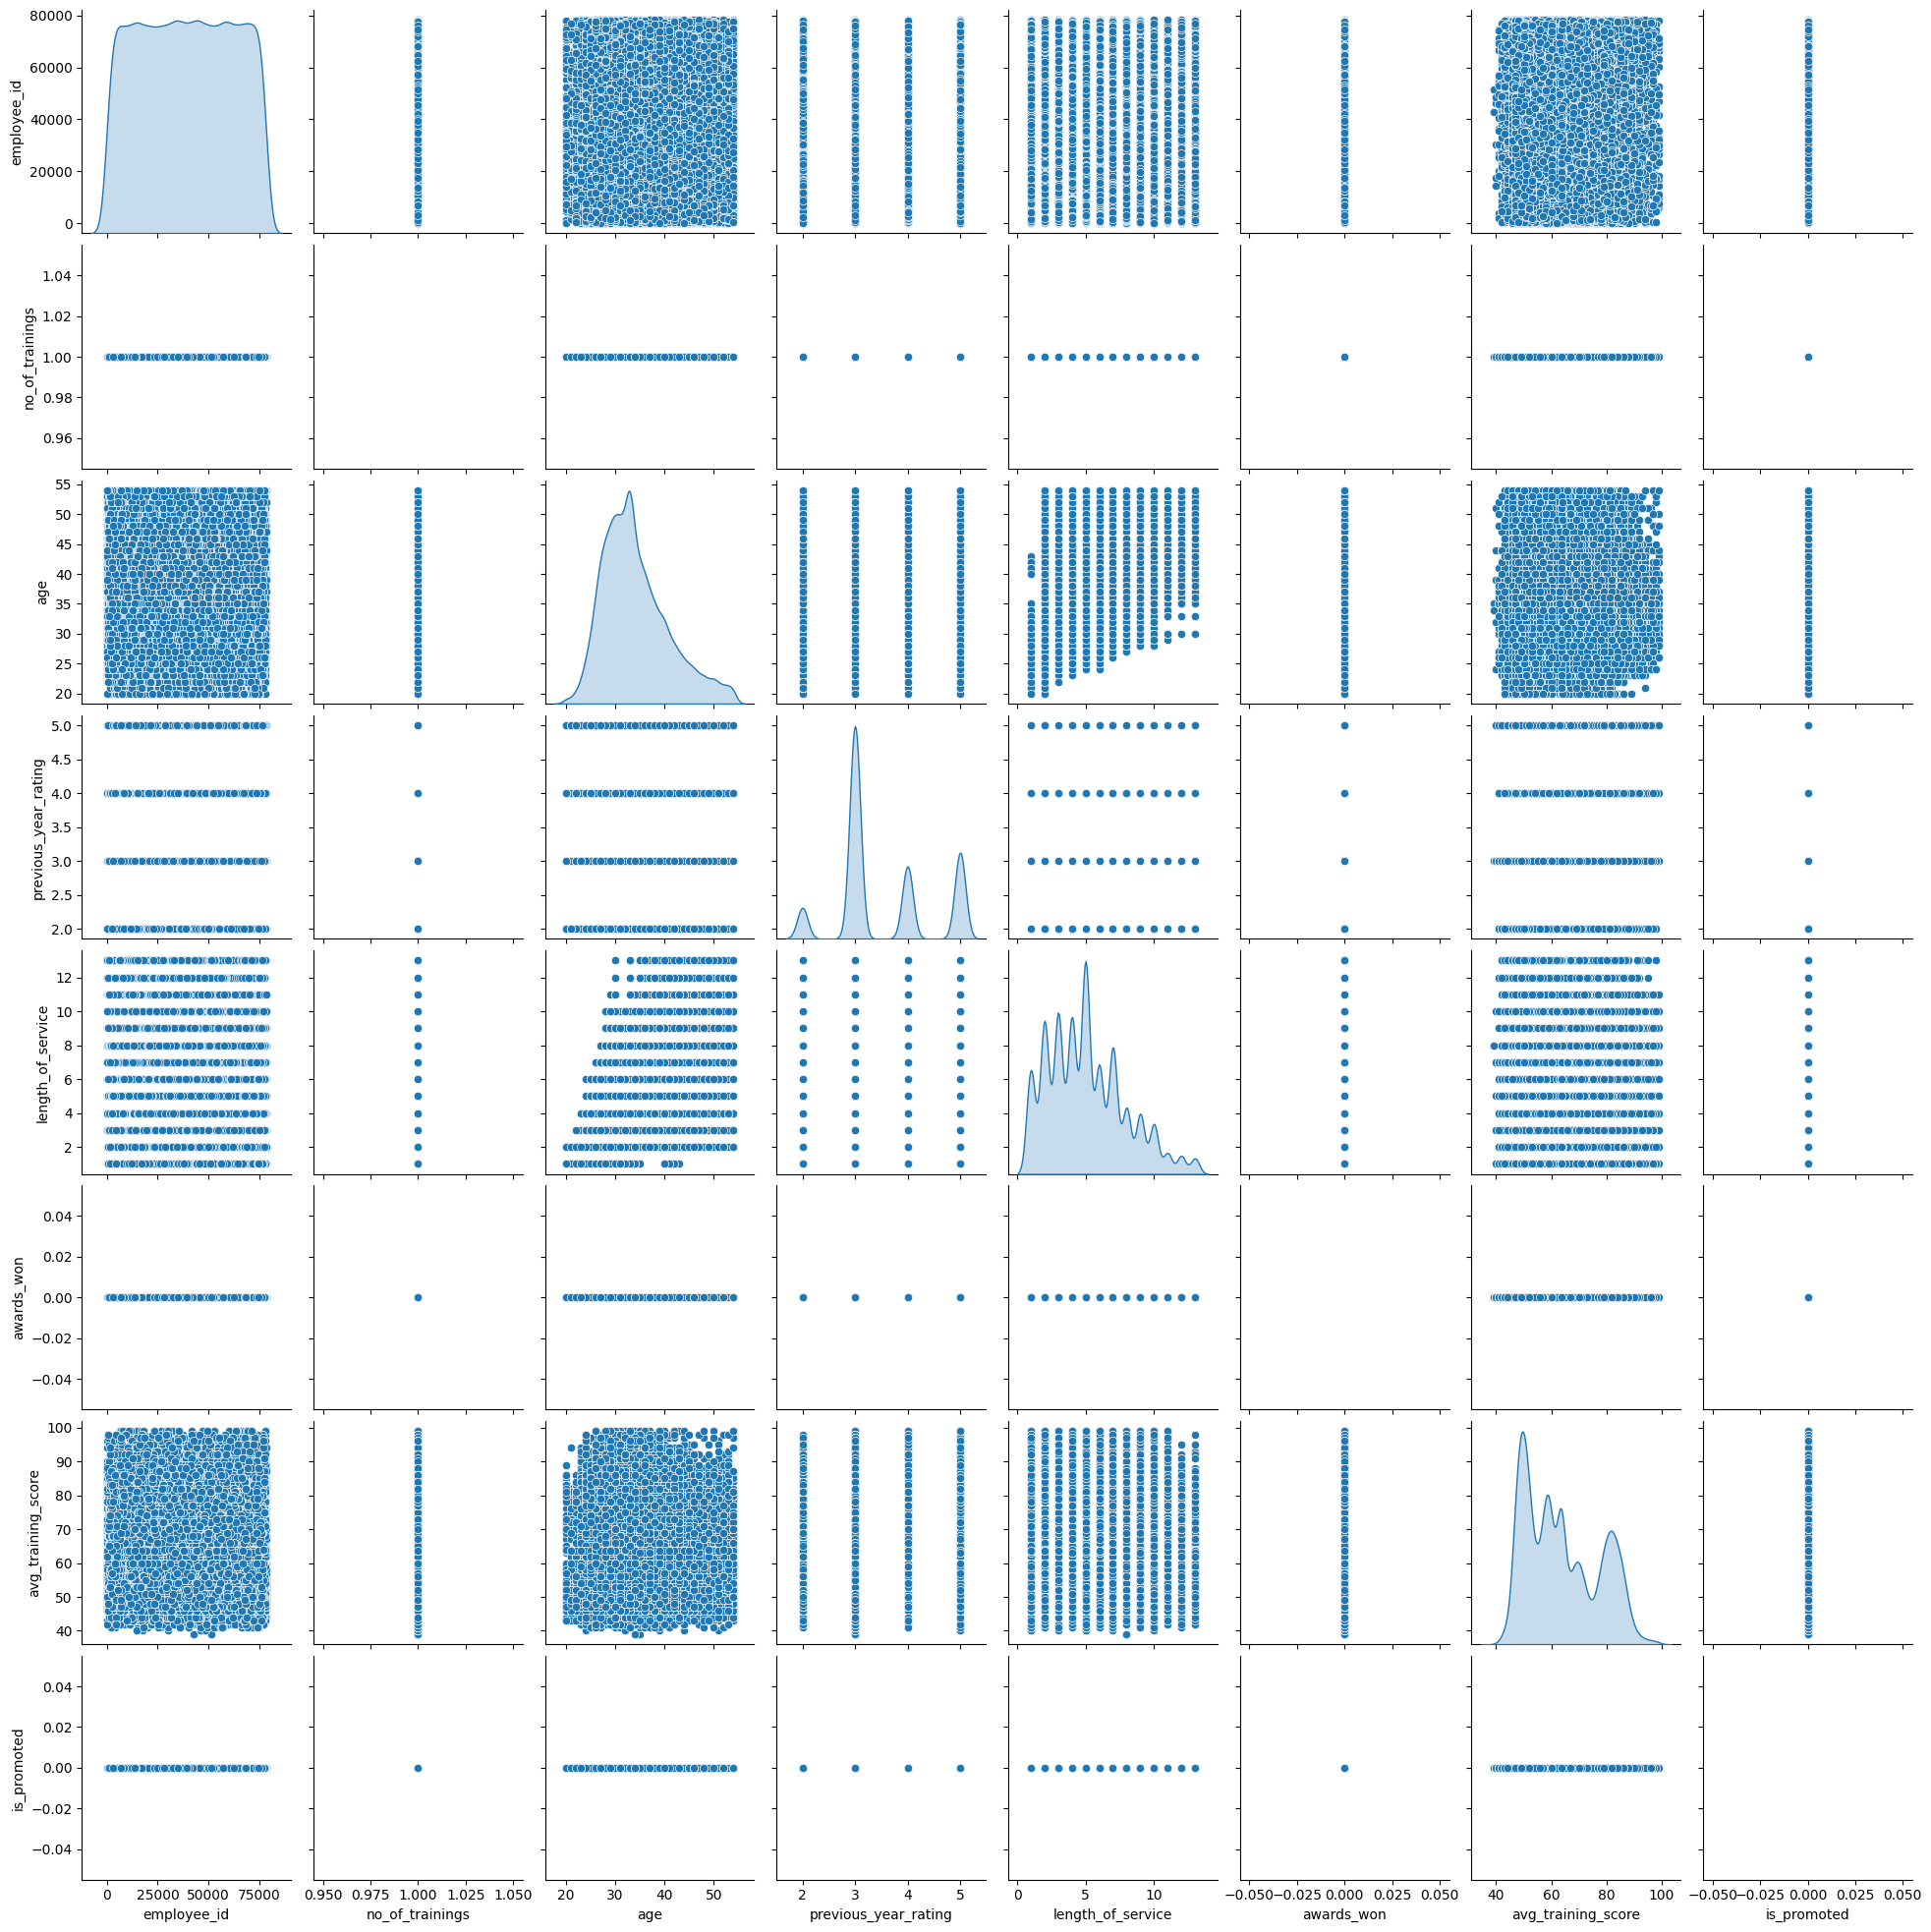

In [75]:
# pairplot of variables
sns.pairplot(df, diag_kind='kde')

Observation
- From the pairplot above, after addressing outliers by replacing them with the median, it was observed that the data remained non-normally distributed. Although median imputation effectively handles extreme values, it doesn't fully resolve the skewness in the data. To further address this, a log transformation is appropriate, as it can reduce skewness and make the distribution more symmetrical. This transformation will help normalize the data, improving its suitability for modeling and ensuring better performance with algorithms that assume normality.

**Heatmap**

**Log Transformation**

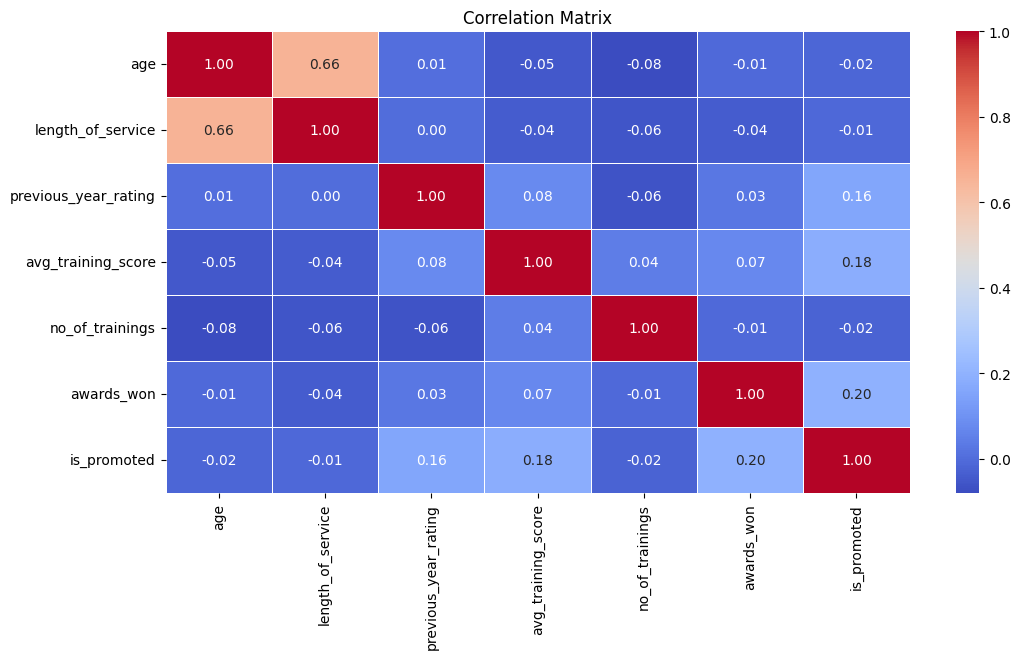

In [126]:
# Correlation matrix
plt.figure(figsize=(12,6))
corr_matrix = df[['age', 'length_of_service', 'previous_year_rating', 'avg_training_score', 'no_of_trainings', 'awards_won', 'is_promoted']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Observation
- The strongest positive correlation is between "age" and "length of service" (0.66), while "awards won" and "avg_training_score" have moderate positive correlations with "is_promoted" (0.20 and 0.18 respectively). This indicates tenure is closely linked, and performance indicators like awards and training scores significantly impact promotions.

In [147]:
age_log = np.log1p(df['age'])
service_log = np.log1p(df['length_of_service'])
score_log = np.log1p(df['avg_training_score'])

df.insert(6, 'age_log', age_log)
df.insert(9, 'length_of_service_log', service_log)
df.insert(12, 'avg_training_score_log', score_log)

df.head()

,employee_id,department,region,education,gender,recruitment_channel,age_log,no_of_trainings,age,length_of_service_log,previous_year_rating,length_of_service,avg_training_score_log,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,3.583519,1,35,2.197225,5.0,8,3.912023,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,3.433987,1,30,1.609438,5.0,4,4.110874,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,3.555348,1,34,2.079442,3.0,7,3.931826,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,3.688879,2,39,2.397895,1.0,10,3.931826,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,3.828641,1,45,1.098612,3.0,2,4.304065,0,73.0,0


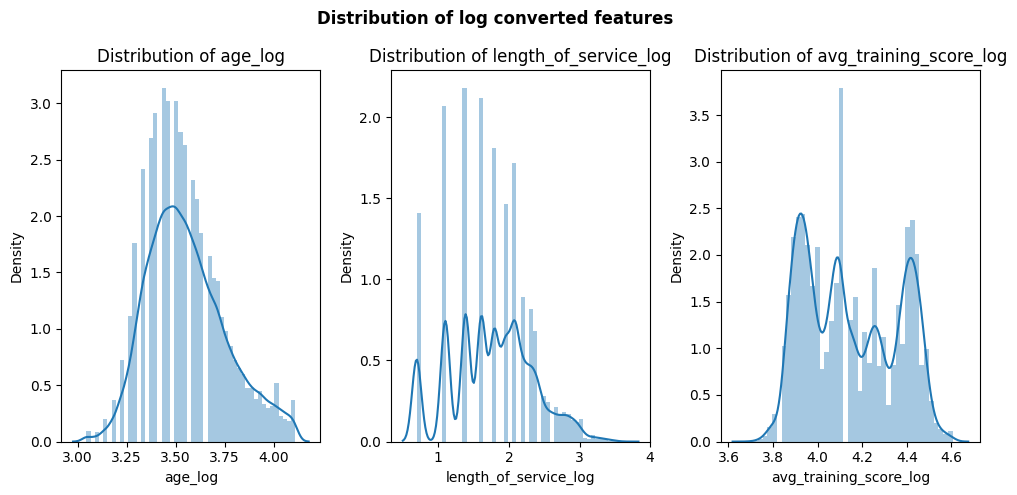

In [150]:
log_columns = ['age_log', 'length_of_service_log', 'avg_training_score_log']

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

sns.distplot(df['age_log'], ax=ax1)
ax1.set_title('Distribution of age_log')
sns.distplot(df['length_of_service_log'], ax=ax2)
ax2.set_title('Distribution of length_of_service_log')
sns.distplot(df['avg_training_score_log'], ax=ax3)
ax3.set_title('Distribution of avg_training_score_log')

plt.suptitle('Distribution of log converted features', fontweight='bold')
plt.tight_layout()
plt.show()

Observation
- This kde plot shows log-transformed histograms for age, length of service, and average training score. Log transformation reduces skewness and makes data more normally distributed, aiding analysis. The histograms reveal common value ranges for each feature after transformation.

****One Hot Encoding****



- One-hot encoding is applied to categorical variables like 'department' and 'region' to convert them into a numerical format suitable for machine learning models. 
- It prevents the misinterpretation of categories as ordinal data and ensures each category is treated independently. 
- This technique helps the model capture important patterns without introducing bias.

In [190]:
#Create a copy of the DataFrame to avoid modifying the original
df_encoded = df.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical columns as numbers
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Display the first few rows of the encoded DataFrame
df_encoded.head()


,employee_id,department,region,education,gender,recruitment_channel,age_log,no_of_trainings,age,length_of_service_log,previous_year_rating,length_of_service,avg_training_score_log,awards_won,avg_training_score,is_promoted
0,65438,7,31,2,0,2,3.583519,1,35,2.197225,5.0,8,3.912023,0,49.0,0
1,65141,4,14,0,1,0,3.433987,1,30,1.609438,5.0,4,4.110874,0,60.0,0
2,7513,7,10,0,1,2,3.555348,1,34,2.079442,3.0,7,3.931826,0,50.0,0
3,2542,7,15,0,1,0,3.688879,2,39,2.397895,1.0,10,3.931826,0,50.0,0
4,48945,8,18,0,1,0,3.828641,1,45,1.098612,3.0,2,4.304065,0,73.0,0


In [219]:
# Encoding the required columns using one-hot encoding
df_encoded = pd.get_dummies(df)

# Display the first few rows of the encoded DataFrame
df_encoded.head()

,employee_id,age_log,no_of_trainings,age,length_of_service_log,previous_year_rating,length_of_service,avg_training_score_log,awards_won,avg_training_score,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,3.583519,1,35,2.197225,5.0,8,3.912023,0,49.0,...,False,False,False,False,True,True,False,False,False,True
1,65141,3.433987,1,30,1.609438,5.0,4,4.110874,0,60.0,...,False,False,True,False,False,False,True,True,False,False
2,7513,3.555348,1,34,2.079442,3.0,7,3.931826,0,50.0,...,False,False,True,False,False,False,True,False,False,True
3,2542,3.688879,2,39,2.397895,1.0,10,3.931826,0,50.0,...,False,False,True,False,False,False,True,True,False,False
4,48945,3.828641,1,45,1.098612,3.0,2,4.304065,0,73.0,...,False,False,True,False,False,False,True,True,False,False


In [292]:
# List of columns to convert
# List of columns to convert
boolean_columns = [
    'department_Finance', 'department_HR', 'department_Legal',
    'department_Operations', 'department_Procurement', 'department_R&D',
    'department_Analytics', 'department_Sales & Marketing', 
    'department_Technology', 'region_region_2', 'region_region_7',
    'region_region_10', 'region_region_11', 'region_region_12',
    'region_region_13', 'region_region_14', 'region_region_15',
    'region_region_16', 'region_region_17', 'region_region_18',
    'region_region_19', 'region_region_20', 'region_region_21',
    'region_region_22', 'region_region_23', 'region_region_24',
    'region_region_25', 'region_region_26', 'region_region_27',
    'region_region_28', 'region_region_29', 'region_region_30',
    'region_region_31', 'region_region_32', 'region_region_33',
    'region_region_34', 'region_region_4', 'region_region_5',
    'region_region_6', 'region_region_8', 'region_region_9',
    'education_Below Secondary', 'education_Master\'s & above',
    'education_Bachelor\'s', 
    'gender_m', 'gender_f', 
    'recruitment_channel_referred', 'recruitment_channel_sourcing',
    'recruitment_channel_other'
]

# Convert specified columns in df_encoded to integers (1 for True, 0 for False)
df_encoded[boolean_columns] = df_encoded[boolean_columns].astype(int)

# Display the first few rows to verify changes
df_encoded.head()

,employee_id,age_log,no_of_trainings,age,length_of_service_log,previous_year_rating,length_of_service,avg_training_score_log,awards_won,avg_training_score,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1.161858,0.131451,-0.415276,0.025598,0.757069,1.395766,0.500460,-1.168183,-0.154018,-1.099310,...,0,0,-1,0,1,1,-1,-1,0,1
1,1.148709,-0.607976,-0.415276,-0.627135,-0.256764,1.395766,-0.437395,-0.178871,-0.154018,-0.267579,...,0,0,0,0,0,0,0,0,0,0
2,-1.402741,-0.007853,-0.415276,-0.104948,0.553913,-0.250651,0.265996,-1.069662,-0.154018,-1.023698,...,0,0,0,0,0,0,0,-1,0,1
3,-1.622829,0.652453,1.226063,0.547785,1.103192,-1.897069,0.969387,-1.069662,-0.154018,-1.023698,...,0,0,0,0,0,0,0,0,0,0
4,0.431639,1.343568,-0.415276,1.331064,-1.137853,-0.250651,-0.906322,0.782283,-0.154018,0.715376,...,0,0,0,0,0,0,0,0,0,0


**Scaling the Data**

In [276]:
# Standardize all columns in df_encoded
scaler = StandardScaler()
df_encoded = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

# Display the first few rows
df_encoded.head()

,employee_id,age_log,no_of_trainings,age,length_of_service_log,previous_year_rating,length_of_service,avg_training_score_log,awards_won,avg_training_score,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1.161858,0.131451,-0.415276,0.025598,0.757069,1.395766,0.500460,-1.168183,-0.154018,-1.099310,...,-0.109979,-0.087877,-1.421814,-0.122093,1.634695,1.536223,-1.536223,-1.117915,-0.145876,1.166353
1,1.148709,-0.607976,-0.415276,-0.627135,-0.256764,1.395766,-0.437395,-0.178871,-0.154018,-0.267579,...,-0.109979,-0.087877,0.703327,-0.122093,-0.611735,-0.650947,0.650947,0.894523,-0.145876,-0.857373
2,-1.402741,-0.007853,-0.415276,-0.104948,0.553913,-0.250651,0.265996,-1.069662,-0.154018,-1.023698,...,-0.109979,-0.087877,0.703327,-0.122093,-0.611735,-0.650947,0.650947,-1.117915,-0.145876,1.166353
3,-1.622829,0.652453,1.226063,0.547785,1.103192,-1.897069,0.969387,-1.069662,-0.154018,-1.023698,...,-0.109979,-0.087877,0.703327,-0.122093,-0.611735,-0.650947,0.650947,0.894523,-0.145876,-0.857373
4,0.431639,1.343568,-0.415276,1.331064,-1.137853,-0.250651,-0.906322,0.782283,-0.154018,0.715376,...,-0.109979,-0.087877,0.703327,-0.122093,-0.611735,-0.650947,0.650947,0.894523,-0.145876,-0.857373


In [277]:
# Check for NaN values in the DataFrame
nan_counts = df_encoded.isna().sum()

# Display columns with NaN values
print(nan_counts[nan_counts > 0])


Series([], dtype: int64)


In [278]:
# List of columns with NaN values
columns_with_nan = [
    'previous_year_rating', 
    'avg_training_score_log', 
    'avg_training_score'
]

# Replace NaN values with the median for each specified column
for column in columns_with_nan:
    median_value = df_encoded[column].median()
    df_encoded[column].fillna(median_value, inplace=True)

# Display the first few rows to verify changes
#rint(df_encoded[columns_with_nan].head())

***Splitting the Data***

In [261]:
x = df_encoded.drop(columns=['is_promoted'], inplace=False)
y = df_encoded['is_promoted'].astype(int)

In [260]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

****Model Building****

we’ll be using the following models:

- Decision Tree Classifier
- Random Forest Classifier
- Logistic Regression

In [288]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    # Calculate confusion matrix for true vs predicted labels
    confusion = confusion_matrix(y_test, pred)
    
    # Calculate various evaluation metrics
    accuracy = accuracy_score(y_test, pred)  # Accuracy of predictions
    precision = precision_score(y_test, pred, average="macro")  # Precision of predictions
    recall = recall_score(y_test, pred, average="macro")  # Recall of predictions
    f1 = f1_score(y_test, pred, average="macro")  # F1 score (harmonic mean of precision and recall)

    # Calculate ROC AUC if predicted probabilities are provided
    if pred_proba is not None:
        roc_auc = roc_auc_score(y_test, pred_proba)  # AUC score for model performance
    else:
        roc_auc = None  # Set AUC to None if probabilities are not available

    # Print evaluation results
    print('Confusion Matrix:')
    print(confusion)  # Display the confusion matrix
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(
        accuracy, precision, recall, f1, roc_auc if roc_auc is not None else 'N/A'  # Print metrics
    ))

**Logistic Regression**

In [289]:
lr_clf = LogisticRegression()

In [290]:
lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
lr_pred_proba = lr_clf.predict_proba(x_test)[:, 1]

In [291]:
get_clf_eval(y_test, lr_pred, lr_pred_proba)

Confusion Matrix:
[[15019    30]
 [ 1022   372]]
Accuracy: 0.9360, Precision: 0.9308, Recall: 0.6324, F1: 0.6902, AUC: 0.7841


Result Explanation:

Confusion Matrix:
- True Negatives (TN): 15,019 instances correctly predicted as negative.
- False Positives (FP): 30 instances incorrectly predicted as positive.
- False Negatives (FN): 1,022 instances incorrectly predicted as negative.
- True Positives (TP): 372 instances correctly predicted as positive.

Accuracy:
- A high accuracy of 93.60% indicates the model performs well overall, correctly classifying a majority of instances.
Precision:

- At 93.08%, this means when the model predicts a positive outcome, it is correct about 93.08% of the time. This is important in scenarios where false positives can lead to significant consequences.

Recall:
- The recall of 63.24% indicates that the model identifies about 63.24% of all actual positive instances. A lower recall may suggest that the model is missing some positive cases, which can be critical depending on the application.

F1 Score:
- The F1 score of 0.6902 balances precision and recall, providing a single metric to evaluate the model's performance, particularly when dealing with class imbalances.

AUC:
An AUC of 0.7841 suggests the model has a good ability to distinguish between positive and negative classes. A score closer to 1 indicates better model performance.

**Random Forest Classifier**

In [279]:
rf_clf = RandomForestClassifier()

In [281]:
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
rf_pred_proba = rf_clf.predict_proba(x_test)[:, 1]

In [282]:
get_clf_eval(y_test, rf_pred, rf_pred_proba)

Confusion Matrix:
[[15017    32]
 [ 1000   394]]
Accuracy: 0.9372, Precision: 0.9312, Recall: 0.6403, F1: 0.6999, AUC: 0.7772


Result Explanation:

Confusion Matrix:
- True Negatives (TN): 15,017 instances correctly predicted as negative.
- False Positives (FP): 32 instances incorrectly predicted as positive.
- False Negatives (FN): 1,000 instances incorrectly predicted as negative.
- True Positives (TP): 394 instances correctly predicted as positive.

Accuracy:
- The model achieves an accuracy of 93.72%, indicating a large majority of predictions were correct.

Precision:
-With a precision of 93.12%, this means when the model predicts a positive outcome, it is correct 93.12% of the time. This metric is important in scenarios where false positives can have serious implications.

Recall:
- The recall of 64.03% indicates the model is identifying about 64.03% of all actual positive cases. This suggests the model misses some positive instances, which could be critical depending on the use case.

F1 Score:
- The F1 score of 0.6999 provides a balance between precision and recall, showing moderate performance in distinguishing between classes, especially when the classes are imbalanced.

AUC:
- An AUC of 0.7772 suggests the model has a decent ability to differentiate between positive and negative classes, although there is room for improvement.

**Decision Tree Classifier**

In [284]:
dt_clf = DecisionTreeClassifier()

In [286]:
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
dt_pred_proba = dt_clf.predict_proba(x_test)[:, 1]

In [287]:
get_clf_eval(y_test, dt_pred, dt_pred_proba)

Confusion Matrix:
[[13977  1072]
 [  814   580]]
Accuracy: 0.8853, Precision: 0.6480, Recall: 0.6724, F1: 0.6588, AUC: 0.6724


Result Explanation:

Confusion Matrix:
- True Negatives (TN): 13,977 instances correctly predicted as negative.
- False Positives (FP): 1,072 instances incorrectly predicted as positive.
- False Negatives (FN): 814 instances incorrectly predicted as negative.
- True Positives (TP): 580 instances correctly predicted as positive.

Accuracy:
- The model has an accuracy of 88.53%, meaning that while a majority of predictions are correct, there is a significant number of misclassifications.

Precision:
- With a precision of 64.80%, this indicates that when the model predicts a positive outcome, only about 64.80% of those predictions are correct. This suggests a higher rate of false positives.

Recall:
- The recall of 67.24% means that the model successfully identifies 67.24% of all actual positive instances. This indicates that the model misses a notable number of positives, which could be a concern in critical applications.

F1 Score:
- The F1 score of 0.6588 reflects a balance between precision and recall, showing moderate performance, especially in scenarios where both false positives and false negatives are impactful.

AUC:
- An AUC of 0.6724 suggests that the model has a moderate ability to distinguish between positive and negative classes, but there is considerable room for improvement.

***Model Evaluation Summary***

In evaluating the three models

- Logistic Regression and Random Forest Classifier are the strongest performers, exhibiting high accuracy and precision with the Random Forest slightly outperforming Logistic Regression overall. However, both models have room for improvement in recall.

- Decision Tree Classifier underperforms compared to the other two models in terms of accuracy and precision, although it does identify more true positives.

*****HR Employee Promotion Prediction: Conclusion*****

In this project, we explored the factors influencing employee promotions using a dataset with multiple employee attributes. 
We started by cleaning and preparing the data, handled missing values and outliers, and performed feature engineering to ensure our models could perform optimally.

Three machine learning models were trained—Logistic Regression, Random Forest, and Decision Tree. 
Among them, the Random Forest Classifier performed best, offering a high level of accuracy and precision in predicting promotions.

Key Insights:
- **Training Scores** and **Previous Year Ratings** were found to be significant indicators of promotion likelihood.
- Employees in the **Technology** and **Analytics** departments had higher promotion rates, while those in **HR** and **Legal** had lower rates.
- Higher **Average Training Scores** consistently correlated with a higher likelihood of promotion.
- There were slight **gender disparities** in promotion rates, with females showing a marginally higher rate.

This analysis provides valuable insights for HR teams, enabling them to make data-driven decisions that can improve fairness and efficiency in the promotion process. 
By identifying the factors most influential in promotions, organizations can optimize their HR practices and better support employee growth.